In [1]:
import numpy as np
import matplotlib.pyplot as plt

# OpenMP

In [2]:
num_thread_list = [1, 2, 4, 6, 8, 10, 12, 14, 16]

In [3]:
exec_time_list = np.zeros((9, 10), dtype=np.float64)

In [4]:
for thread_idx, num_thread in enumerate(num_thread_list):
    for repeat in range(10):
        output = ! ./openmp_ray {num_thread}
        exec_time_list[thread_idx, repeat] = float(output[0].split(':')[1].split('sec')[0].strip())
        print(exec_time_list[thread_idx, repeat])

0.497
0.503
0.495
0.498
0.499
0.495
0.501
0.502
0.505
0.492
0.267
0.296
0.306
0.262
0.256
0.264
0.263
0.305
0.263
0.249
0.131
0.146
0.138
0.15
0.158
0.147
0.157
0.157
0.131
0.148
0.109
0.097
0.104
0.106
0.103
0.116
0.113
0.095
0.101
0.11
0.087
0.093
0.092
0.098
0.091
0.091
0.093
0.097
0.089
0.1
0.089
0.089
0.091
0.086
0.089
0.093
0.094
0.091
0.099
0.086
0.088
0.09
0.089
0.087
0.089
0.09
0.087
0.089
0.087
0.093
0.087
0.087
0.088
0.09
0.089
0.089
0.087
0.092
0.089
0.088
0.087
0.092
0.088
0.089
0.086
0.091
0.086
0.09
0.088
0.091


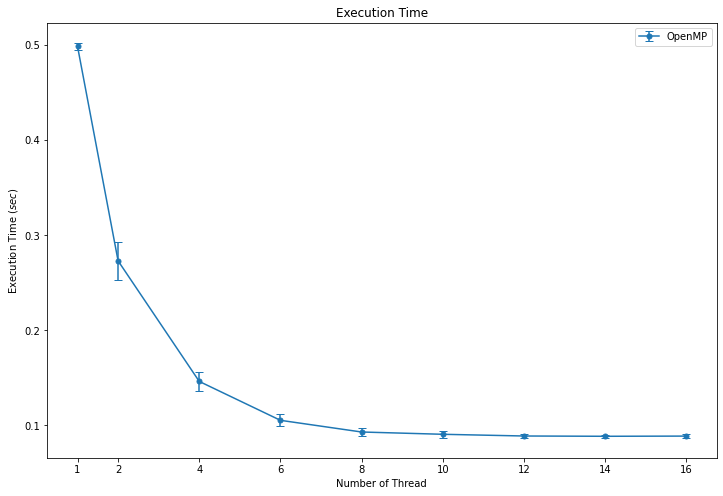

In [13]:
plt.figure(figsize=(12,8))
plt.errorbar(
    x=num_thread_list, 
    y=np.mean(exec_time_list, axis=1), 
    yerr=np.std(exec_time_list, axis=1),
    fmt='o-',
    capsize=4,
    markersize=5,
    label='OpenMP'
)
plt.legend()
plt.xticks(num_thread_list)
plt.title('Execution Time')
plt.xlabel('Number of Thread')
plt.ylabel('Execution Time $(sec)$')
plt.show()

In [14]:
np.mean(exec_time_list, axis=1)

array([0.4987, 0.2731, 0.1463, 0.1054, 0.0931, 0.0907, 0.0889, 0.0886,
       0.0888])

# CUDA

In [15]:
single_time_list = np.zeros((10), dtype=np.float64)

In [16]:
for repeat in range(10):
    output = ! ./raytracing 0 dummy.ppm
    single_time_list[repeat] = float(output[0].split(':')[1].split('sec')[0].strip())
    print(single_time_list[repeat])

1.476
1.486
1.497
1.44
1.519
1.363
1.463
1.488
1.496
1.479


In [23]:
np.mean(single_time_list)

1.4707000000000001

In [18]:
cuda_time_list = np.zeros((10), dtype=np.float64)

In [20]:
for repeat in range(10):
    output = ! ./cuda_ray
    cuda_time_list[repeat] = float(output[0].split(':')[1].split('sec')[0].strip())
    print(cuda_time_list[repeat])

1.134
1.143
1.262
1.219
1.196
1.215
1.227
1.153
1.21
1.235


In [21]:
np.mean(cuda_time_list)

1.1994

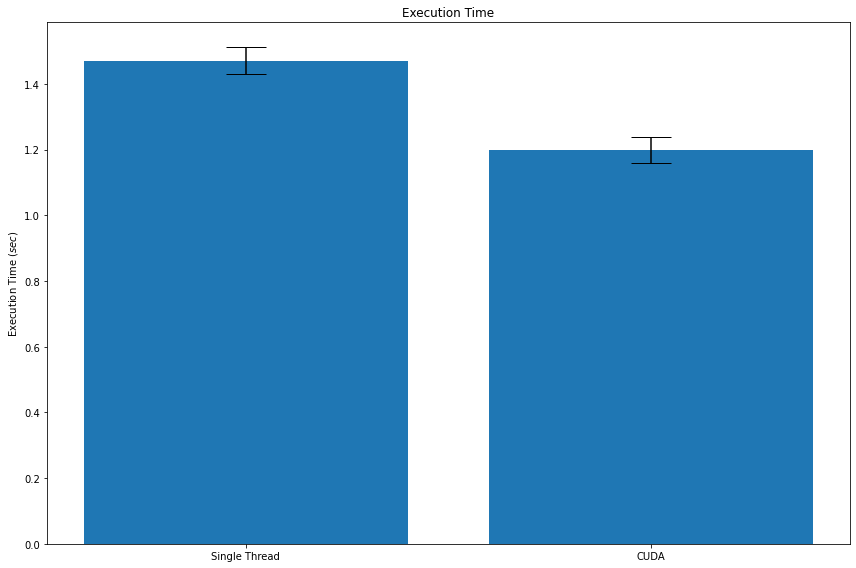

In [48]:
# plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(
    x=[0,1], 
    height=[np.mean(single_time_list), np.mean(cuda_time_list)], 
    yerr=[np.std(single_time_list), np.std(cuda_time_list)],
    align='center',
    capsize=20,
)
# plt.xlim(-0.5, 1.5)
ax.set_title('Execution Time')
# plt.xlabel('Number of Thread')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Single Thread', 'CUDA'])
ax.set_ylabel('Execution Time $(sec)$')
plt.tight_layout()
plt.show()